# Data Science FX project : Daniel Barclay 2019 - 2020
# Federal Reserve Economic Data (FRED) FX Analysis Project

I wanted to do some exploratory analysis of foreign exchange rate time series data.

I looked at the [Federal Reserve Economic Data (FRED) website](https://fred.stlouisfed.org).

I accessed this through pandas in Python using the data reader package, which loads the data into a data frame.

The log return diagrams show the rate of change of each currency day on day.

Each analysis gives further insight about the data. For instance, the swiss franc showed an opposite trend to most of the currencies.

Next I created a scatter matrix

The scatter matrix has pair plots of one currency against another in a square grid. The diagonal plots however show the histogram or probability density of a single exchange rate. It estimates the rate of occurrence of each value.

An anomaly appears to be the Danish Kroner as it appears to be almost perfectly correlated with the euro (appearing as a straight diagonal line in the pair plot).

Then I showed a heatmap plot of correlations which essentially show how each exchange rate is correlated. We can see that the euro-USD exchange rate is fairly strongly correlated with the GBP-USD (deep orange).

This is useful for investors to diversify and spread risk. Investors should choose exchange rates that are poorly correlated or anti-correlated (blue in this diagram).

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [25]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
start = dt.datetime(2007,1,1)
end = dt.datetime(2019,12,31)
fx_symbols = ["DEXUSUK", "DEXUSEU", "DEXJPUS", "DEXCAUS", "DEXDNUS", "DEXNOUS","DEXSZUS","DEXSDUS","DEXCHUS"]
FX = web.DataReader(fx_symbols, 'fred', start,end)

In [26]:
fred2iso = {'US':'USD', 'UK':'GBP', 'EU':'EUR', 'JP':'JPY', 'CA':'CAD', 'DN':'DKK', 'NO':'NOK', 'SZ':'CHF', 'SD':'SEK', 'CH':'CNY'}

In [27]:
fred2iso['UK']

'GBP'

In [7]:
cols = [fred2iso[c[5:]] + "-" + fred2iso[c[3:5]] for c in FX.columns]

In [8]:
FX.columns = cols
FX.columns

Index(['GBP-USD', 'EUR-USD', 'USD-JPY', 'USD-CAD', 'USD-DKK', 'USD-NOK',
       'USD-CHF', 'USD-SEK', 'USD-CNY'],
      dtype='object')

I had to invert some data because some exchange rates were US dollars to other currencies, while other exchange rates were other currencies to US dollars, so I had to make them all the same by taking reciprocals as I wanted all exchange rates expressed as other currencies to US dollars. I removed the missing data using the pandas dropna function.

In [9]:
FX['USD-GBP'] = 1/FX['GBP-USD']
FX['USD-EUR'] = 1/FX['EUR-USD']

In [10]:
FX.drop(['EUR-USD','GBP-USD'], axis=1, inplace = True)
FX.dropna(inplace = True)

In [11]:
FX

,USD-JPY,USD-CAD,USD-DKK,USD-NOK,USD-CHF,USD-SEK,USD-CNY,USD-GBP,USD-EUR
DATE,,,,,,,,,
2007-01-02,118.83,1.1647,5.6119,6.1809,1.2125,6.7818,7.8051,0.506688,0.752672
2007-01-03,119.58,1.1699,5.6589,6.2598,1.2263,6.8539,7.8051,0.512873,0.759359
2007-01-04,119.28,1.1766,5.6913,6.3229,1.2314,6.9335,7.8090,0.514324,0.763709
2007-01-05,118.77,1.1753,5.7302,6.3513,1.2366,6.9744,7.8047,0.518001,0.768935
2007-01-08,118.49,1.1777,5.7207,6.3592,1.2357,6.9972,7.8127,0.515863,0.767872
2007-01-09,119.45,1.1782,5.7359,6.3536,1.2417,7.0232,7.8055,0.515464,0.769527
2007-01-10,119.52,1.1770,5.7581,6.4363,1.2459,7.0542,7.8075,0.517224,0.772798
2007-01-11,120.49,1.1761,5.7756,6.4728,1.2482,7.0829,7.7945,0.514430,0.774954
2007-01-12,120.36,1.1706,5.7663,6.4623,1.2485,7.0330,7.7984,0.510803,0.773635


I plotted FX rate value to USD against date.

I looked at 6 currencies, looking at data points for each between 2007 – 2011, then I plotted all the currencies over time using Matplotlib

At this point I decided to expand the data to 2007 – 2019 and added 3 more currencies, and the program made the change automatically. I could also easily add other currencies.

\*Because Japanese Yen has a higher exchange rate (approximately 100), it makes fluctuations in the currencies with smaller exchange rates very hard to see if you don’t normalise it.

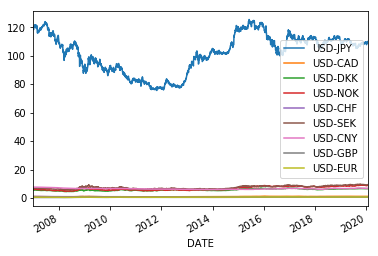

In [12]:
FX.plot()

Then I looked at correlations between each of the different FX rates. The bottom range of the diagram shows how much fluctuation there is in a specific time region for each currency against USD. I used a different colour for each currency.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C687A96E10>,
      dtype=object)

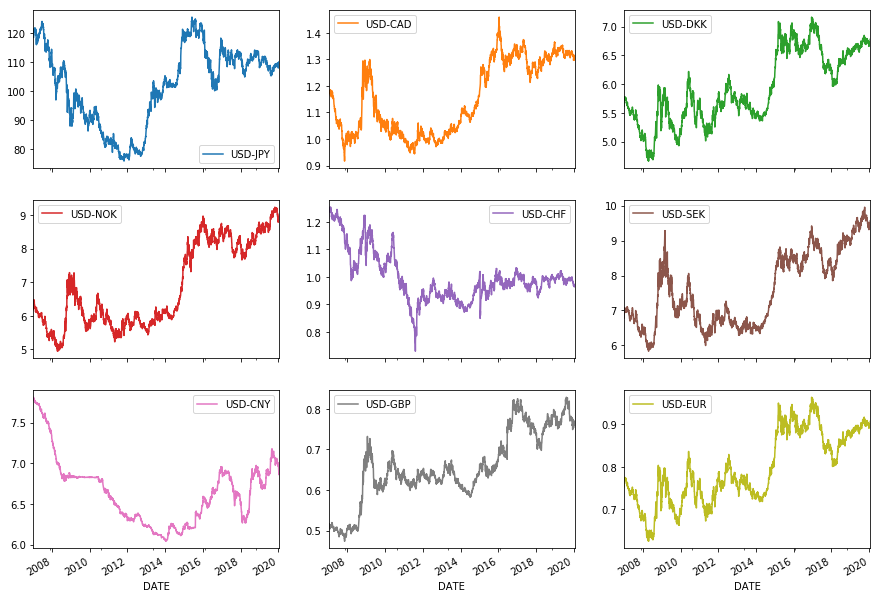

In [13]:
FX.plot(subplots=True,figsize=(15,11),layout=(3, 3))

To show log returns, which is a ratio of 2 consecutive samples.

I found $\log \left(\frac{\text{today}}{\text{previous day}}\right)$, or $\log (\text{today})- \log(\text{previous day})$.

Taking logs turns it into a proportional scaling, in which 0=unchanged, 0.1 = 10% increase, 0.2= 20% increase etc. Logs are the commonly used convention.

The log return diagrams show the rate of change of each currency day on day.

In [14]:
from numpy import log

In [15]:
FX_returns = log(FX/FX.shift(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C68813C940>,
      dtype=object)

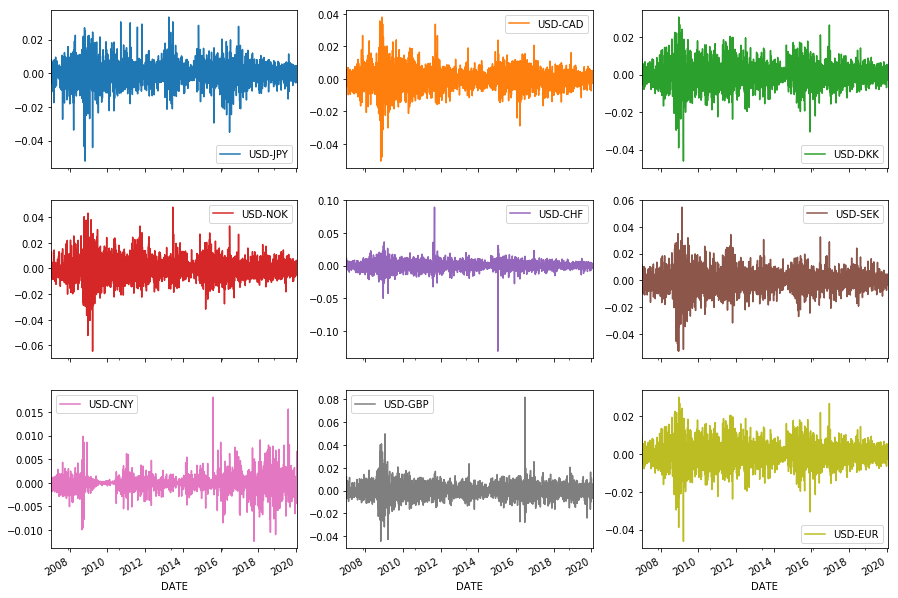

In [16]:
# Now we get the log-returns (one-day)
FX_returns.plot(subplots=True,figsize=(15,11),layout=(3, 3))

Plot of CHF-GBP exchange rate over time

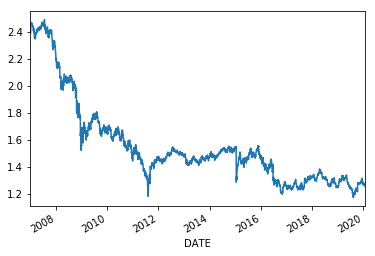

In [17]:
Data_frame = FX['USD-CHF']/FX['USD-GBP']
Data_frame.plot()

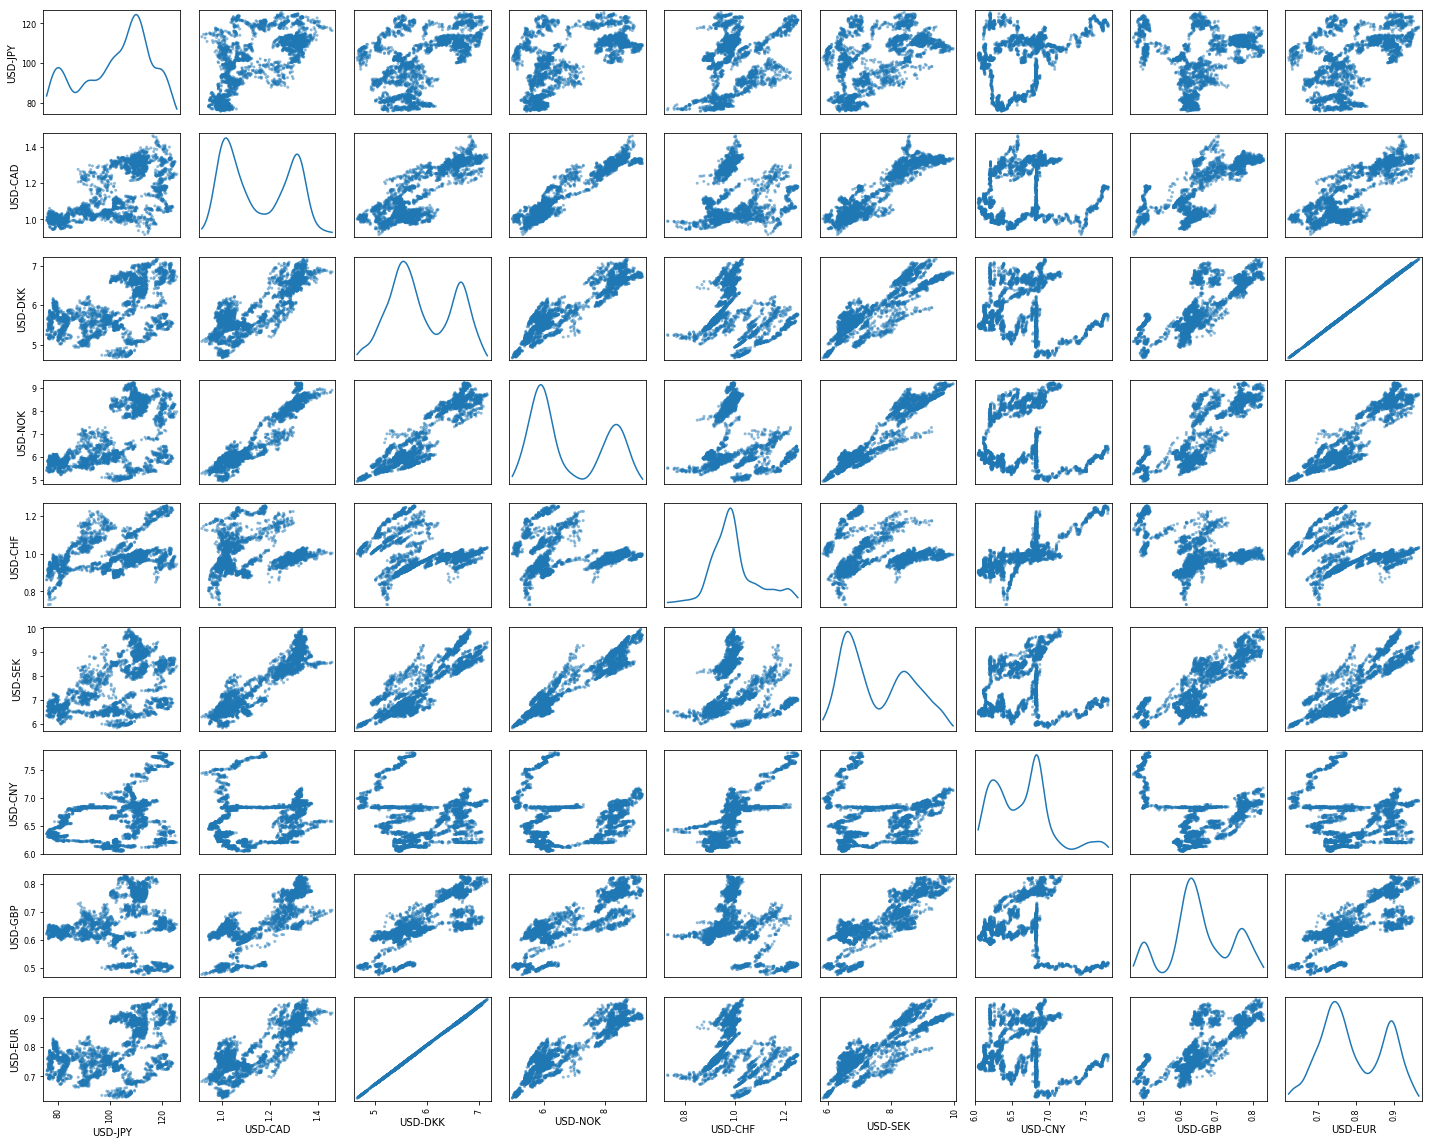

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(FX.loc[:,"USD-JPY":"USD-EUR"], diagonal = "kde",figsize = (20,16))
plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns

I computed a correlation matrix based on the returns which shows how the currencies behave relative to each other. A positive value indicates tracking (+1 = perfectly correlated, 0= no correlation, and a negative value = going in the other direction).

In [20]:
FX.corr()

,USD-JPY,USD-CAD,USD-DKK,USD-NOK,USD-CHF,USD-SEK,USD-CNY,USD-GBP,USD-EUR
USD-JPY,1.000000,0.652845,0.500182,0.581174,0.338163,0.497933,0.301814,0.135194,0.497596
USD-CAD,0.652845,1.000000,0.856415,0.959561,0.073878,0.926845,0.100614,0.742910,0.855304
USD-DKK,0.500182,0.856415,1.000000,0.931380,-0.124880,0.882166,-0.098303,0.802862,0.999906
USD-NOK,0.581174,0.959561,0.931380,1.000000,-0.053960,0.956136,0.019945,0.828014,0.930258
USD-CHF,0.338163,0.073878,-0.124880,-0.053960,1.000000,0.070656,0.813837,-0.292148,-0.123365
USD-SEK,0.497933,0.926845,0.882166,0.956136,0.070656,1.000000,0.121451,0.838689,0.881316
USD-CNY,0.301814,0.100614,-0.098303,0.019945,0.813837,0.121451,1.000000,-0.184958,-0.097666
USD-GBP,0.135194,0.742910,0.802862,0.828014,-0.292148,0.838689,-0.184958,1.000000,0.803867
USD-EUR,0.497596,0.855304,0.999906,0.930258,-0.123365,0.881316,-0.097666,0.803867,1.000000


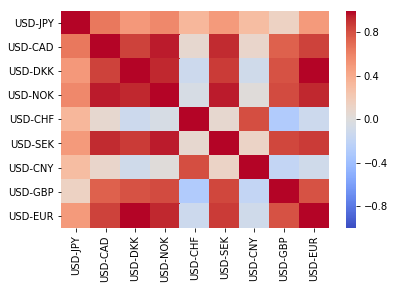

In [21]:
sns.heatmap(FX.corr(),cmap='coolwarm',vmin=-1,vmax=1)

In [22]:
x=FX.corr()
x.values

array([[ 1.        ,  0.6528447 ,  0.50018211,  0.58117376,  0.33816256,
         0.49793313,  0.30181448,  0.13519396,  0.49759555],
       [ 0.6528447 ,  1.        ,  0.8564148 ,  0.95956147,  0.07387801,
         0.92684455,  0.1006144 ,  0.74290982,  0.85530438],
       [ 0.50018211,  0.8564148 ,  1.        ,  0.93137982, -0.1248797 ,
         0.88216598, -0.09830331,  0.80286222,  0.99990609],
       [ 0.58117376,  0.95956147,  0.93137982,  1.        , -0.05396025,
         0.9561361 ,  0.01994546,  0.82801392,  0.93025807],
       [ 0.33816256,  0.07387801, -0.1248797 , -0.05396025,  1.        ,
         0.07065592,  0.8138365 , -0.2921478 , -0.12336476],
       [ 0.49793313,  0.92684455,  0.88216598,  0.9561361 ,  0.07065592,
         1.        ,  0.12145135,  0.83868894,  0.88131634],
       [ 0.30181448,  0.1006144 , -0.09830331,  0.01994546,  0.8138365 ,
         0.12145135,  1.        , -0.18495805, -0.09766575],
       [ 0.13519396,  0.74290982,  0.80286222,  0.82801392, -0

In [23]:
#print(np.linalg.eig(x)[0])

In [24]:
fx=FX.rolling(100).mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C68CB5DB70>,
      dtype=object)

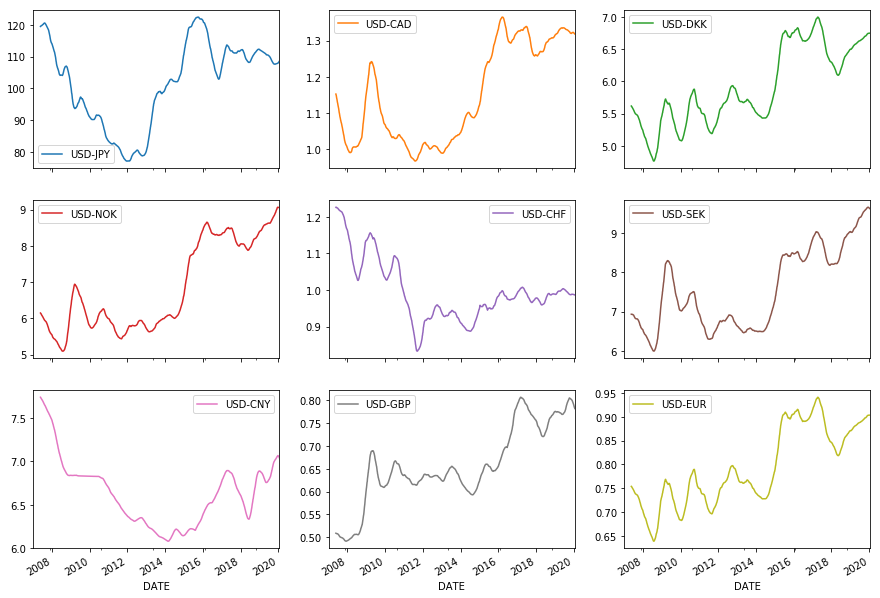

In [25]:
fx.plot(subplots=True,figsize=(15,11),layout=(3, 3))

In [1]:
#fig, axs = plt.subplots(2, 2)
#axs[0,0].plot(FX)
#plt.plot(FX,subplots=True)
#plt.plot(fx)
#FX.plot()
#fx.plot(subplots=True,figsize=(15,11),layout=(3, 3))

# Extending the analysis to energy markets

In [2]:
import quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import seaborn as sns

In [3]:
quandl.ApiConfig.api_key = '4nrCzYAzzubd7HcLYyxb'

In [4]:
df = quandl.get(["EIA/PET_RWTC_D","FRED/DCOILBRENTEU","EIA/NG_RNGWHHD_D","EIA/PET_EER_EPD2F_PF4_Y35NY_DPG_D","EIA/PET_EER_EPMRU_PF4_Y35NY_DPG_D","EIA/PET_EER_EPD2DXL0_PF4_Y35NY_DPG_D","EIA/PET_EER_EPJK_PF4_RGC_DPG_D"])

In [5]:
df.columns = ["WTI","Brent","Natural gas","Heating oil","Gasoline","Diesel","Jet"]

In [6]:
df.columns

Index(['WTI', 'Brent', 'Natural gas', 'Heating oil', 'Gasoline', 'Diesel',
       'Jet'],
      dtype='object')

In [7]:
df

,WTI,Brent,Natural gas,Heating oil,Gasoline,Diesel,Jet
Date,,,,,,,
1986-01-02,25.56,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-03,26.00,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-06,26.53,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-07,25.85,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-08,25.87,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-09,26.03,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-10,25.65,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-13,25.08,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-14,24.97,NaN,NaN,NaN,NaN,NaN,NaN


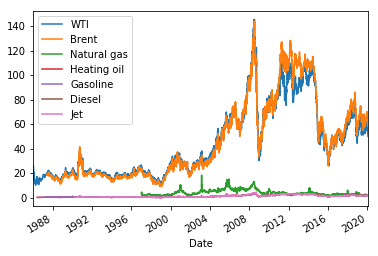

In [8]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF631B3EB8>,
      dtype=object)

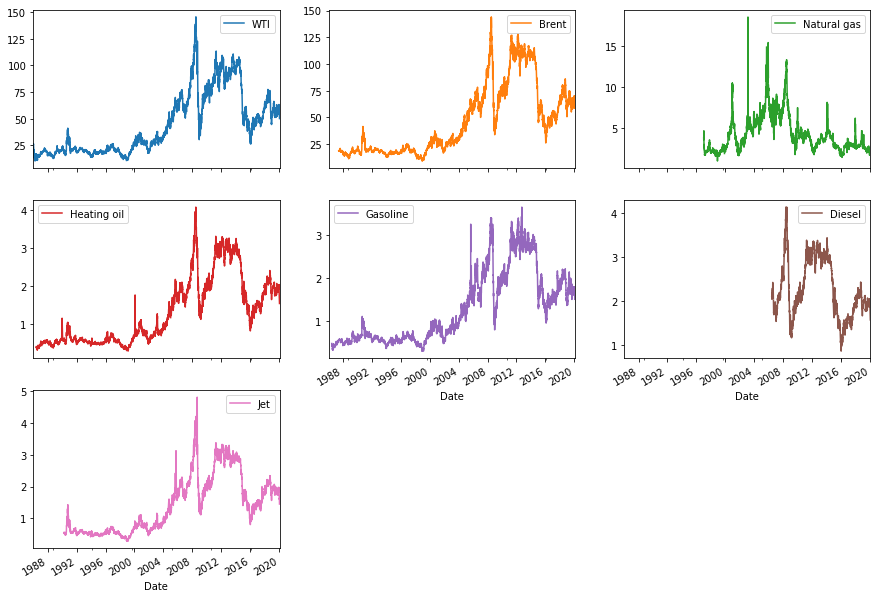

In [9]:
df.plot(subplots=True,figsize=(15,11),layout=(3, 3))

In [10]:
df_returns = np.log(df/df.shift(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF6366E828>,
      dtype=object)

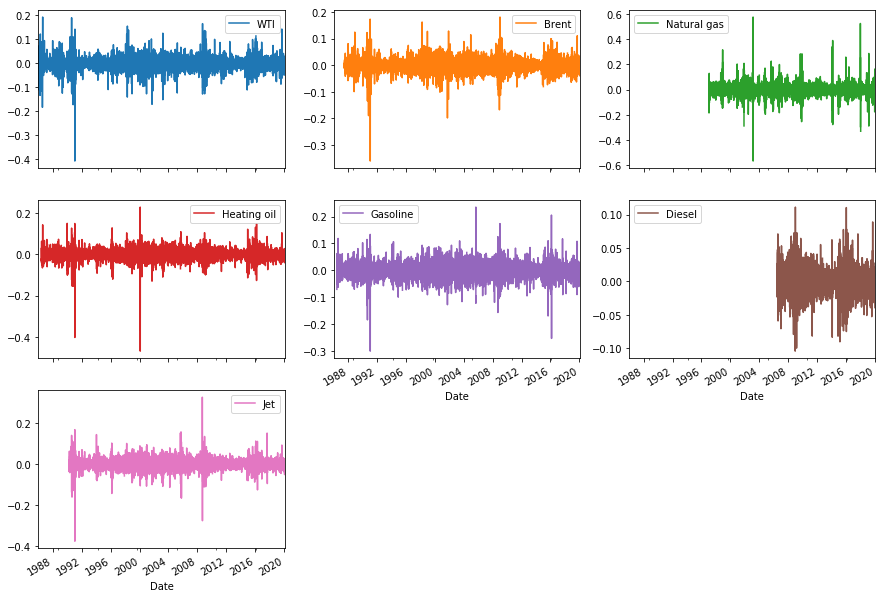

In [11]:
df_returns.plot(subplots=True,figsize=(15,11),layout=(3, 3))

In [12]:
df.corr()

,WTI,Brent,Natural gas,Heating oil,Gasoline,Diesel,Jet
WTI,1.000000,0.990128,0.344994,0.988069,0.983145,0.958897,0.987941
Brent,0.990128,1.000000,0.252316,0.994760,0.990325,0.983102,0.992081
Natural gas,0.344994,0.252316,1.000000,0.287033,0.252957,0.386228,0.316289
Heating oil,0.988069,0.994760,0.287033,1.000000,0.987444,0.996522,0.996336
Gasoline,0.983145,0.990325,0.252957,0.987444,1.000000,0.960997,0.986771
Diesel,0.958897,0.983102,0.386228,0.996522,0.960997,1.000000,0.993204
Jet,0.987941,0.992081,0.316289,0.996336,0.986771,0.993204,1.000000


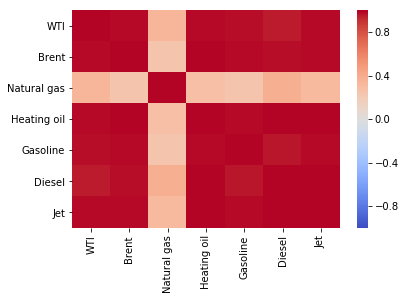

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm',vmin=-1,vmax=1)

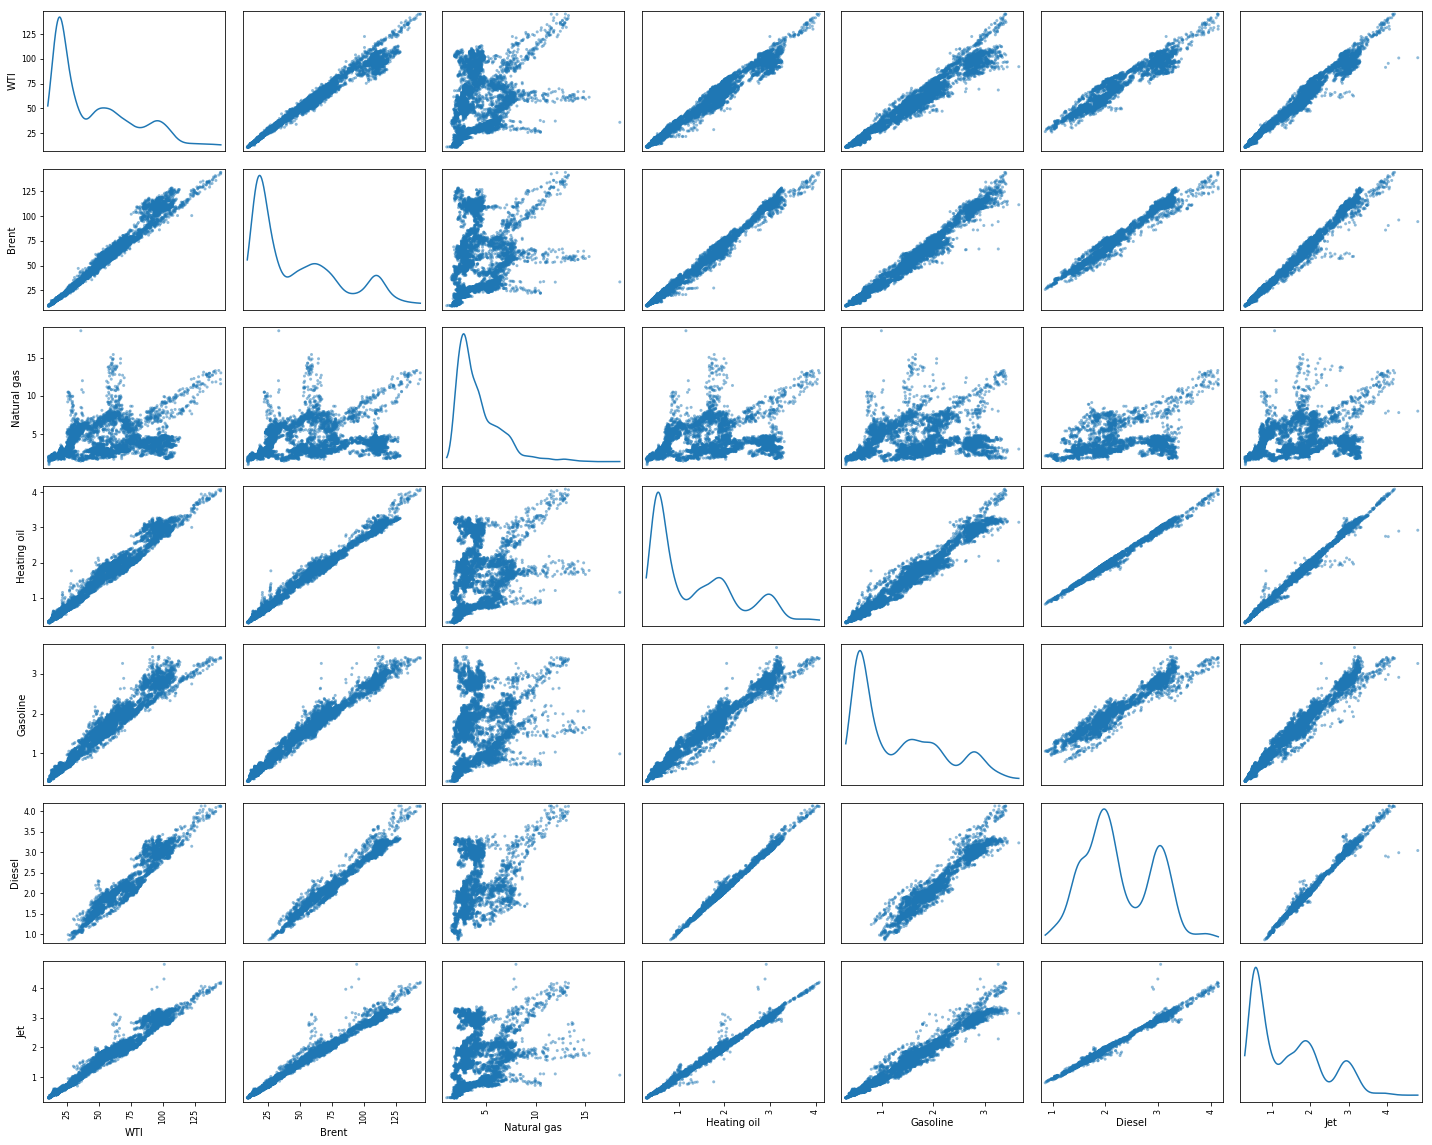

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.loc[:,"WTI":"Jet"], diagonal = "kde",figsize = (20,16))
plt.tight_layout()
plt.show()

In [21]:
df_rolling=df.rolling(50).mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF66AAED30>,
      dtype=object)

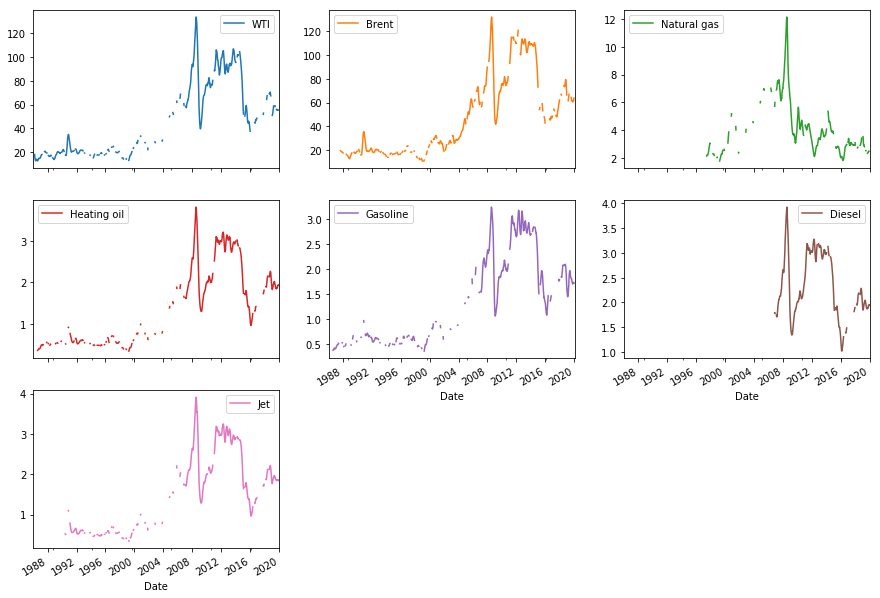

In [22]:
df_rolling.plot(subplots=True,figsize=(15,11),layout=(3, 3))